# Домашнее задание "Временные ряды, общая теория"

Для анализа буду использовать следующие ряды:


- mean-monthly-air-temperature-deg
- daily-total-female-births-in-cal
- monthly-sales-of-company-x-jan-6
- weekly-closings-of-the-dowjones-
- monthly-car-sales-in-quebec-1960

In [115]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [116]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [117]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

#### mean-monthly-air-temperature-deg

In [118]:
mean_monthly_temp_df = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")

mean_monthly_temp_df.head()

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1


In [119]:
mean_monthly_temp = mean_monthly_temp_df.Deg

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


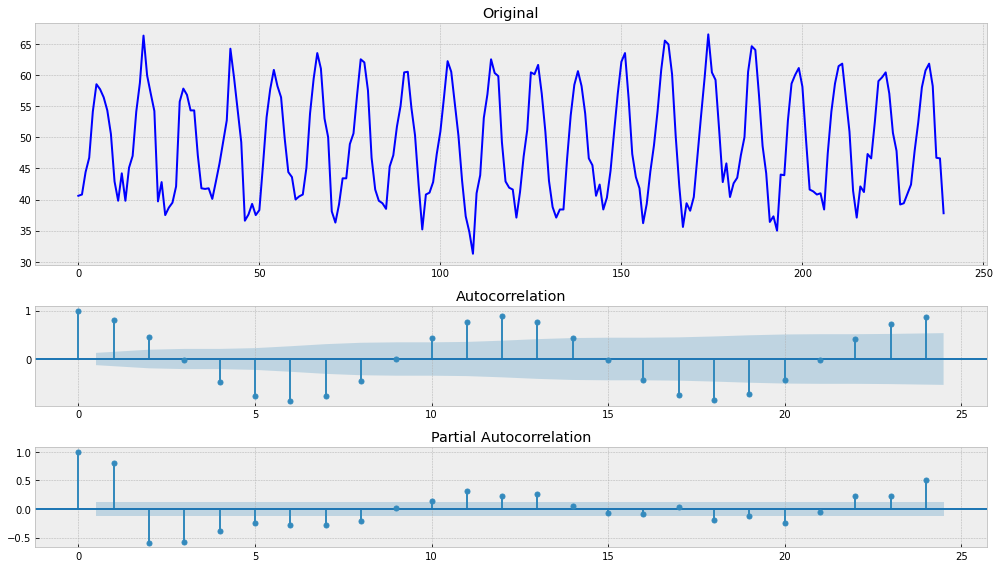

In [120]:
tsplot(mean_monthly_temp)

Рассмотрим результаты с двух точек зрения:

1) Визуально: по графику видно, что ряд имеет ярко выраженную сезонность, поэтому стационарным его считать нельзя

2) На основе статистических тестов:

По тесту Dickey-Fuller видно, что Test Statistic равен -3.255492, а p-value 0.016989

Интерпретация зависит от порогового значения. 

- Если пороговое значение 0.01, то Test Statistic больше Critical Value и  мы не можем отвергуть нулевую гипотезу, т.е. ряд, возможно, нестационарный
- Если пороговое значение 0.05 Test Statistic меньше Critical Value, ряд можно считать стационарным

### Вопрос:

На занятии мы использовали преобразования Бокса-Кокса для того, чтобы убрать изменение дисперсии. На примере этого ряда я не вижу изменение дисперсии, но в некоторых источниках всё равно применяется boxcox. Что является лучшей парктикой?

Попробуем избавиться от сезонности с помощью дифференцирования:

In [121]:
mean_monthly_temp = mean_monthly_temp.values

mean_monthly_temp = mean_monthly_temp[12:] - mean_monthly_temp[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.072501e+00
p-value                        1.141945e-07
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


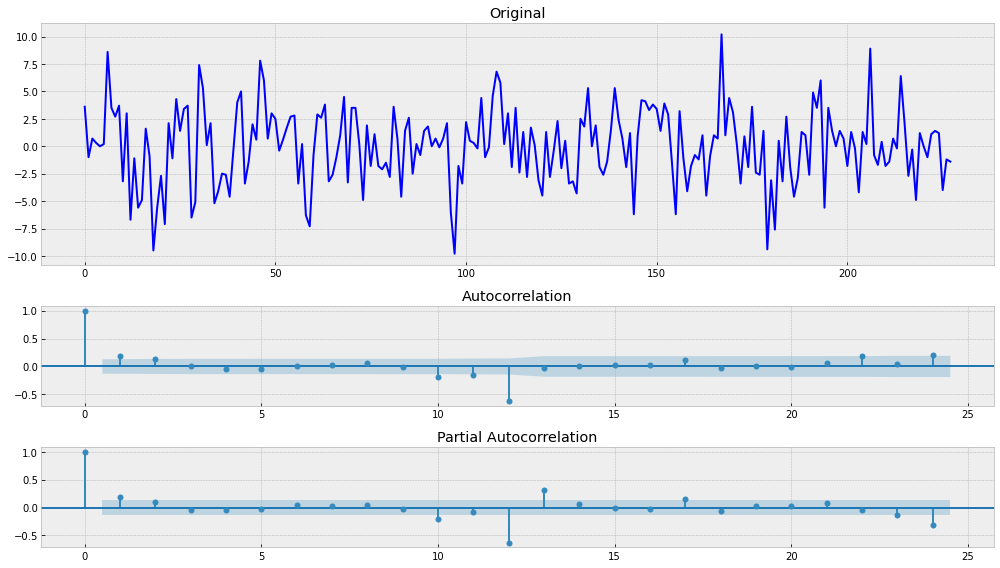

In [122]:
tsplot(mean_monthly_temp)

Стало намного лучше, по статистическим тестам видно, что p-value очень маленький, а Test Statistic меньше Critical Value даже на пороге 0.01 - можно отвергнуть нулевую гипотезу и предположить, что этот ряд стационарный.

#### mean-monthly-air-temperature-deg

In [123]:
female_births_df = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

female_births_df.head()

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [124]:
female_births = female_births_df.Count

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


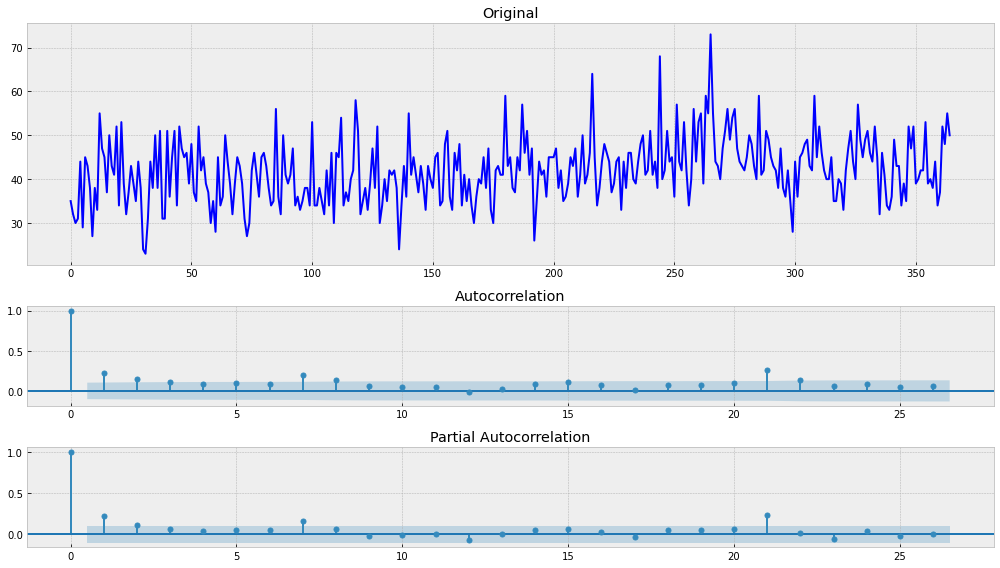

In [125]:
tsplot(female_births)

Здесь и по графикам и по тесту Dickey-Fuller видно, что ряд уже стационарный. Не будем применять к нему никакие преобразования

#### monthly-sales-of-company-x-jan-6

In [146]:
sales_of_company_df = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")

sales_of_company_df.head()

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36


In [155]:
sales_of_company = sales_of_company_df.Count

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


E:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


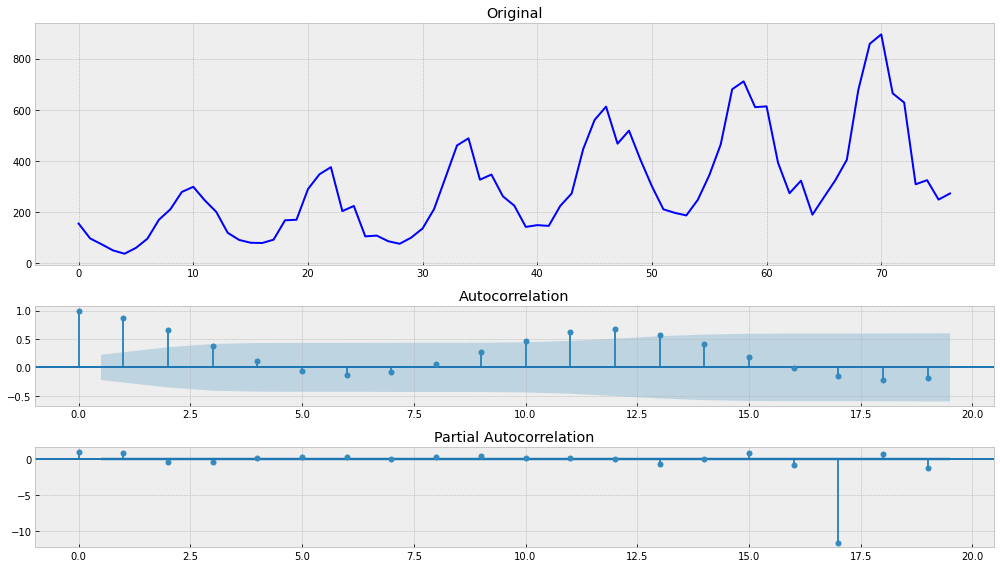

In [128]:
tsplot(sales_of_company)

В этом ряду прослеживается сразу несколько проблем, мешающих стационарности: возрастающий тренд, сезонность и нарастающая дисперсия.
    
Для начала уберём изменение дисперсии.

In [156]:
sales_of_company = boxcox(sales_of_company, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


E:\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


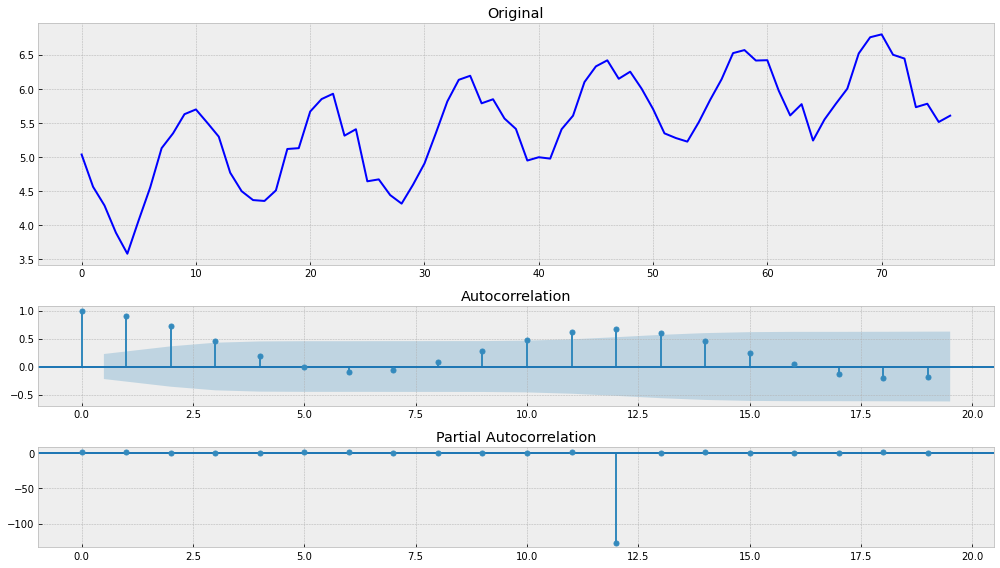

In [157]:
tsplot(sales_of_company)

Дисперсия больше не нарастает. Попробуем дифференцировать

In [158]:
sales_of_company = np.diff(sales_of_company, 1)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


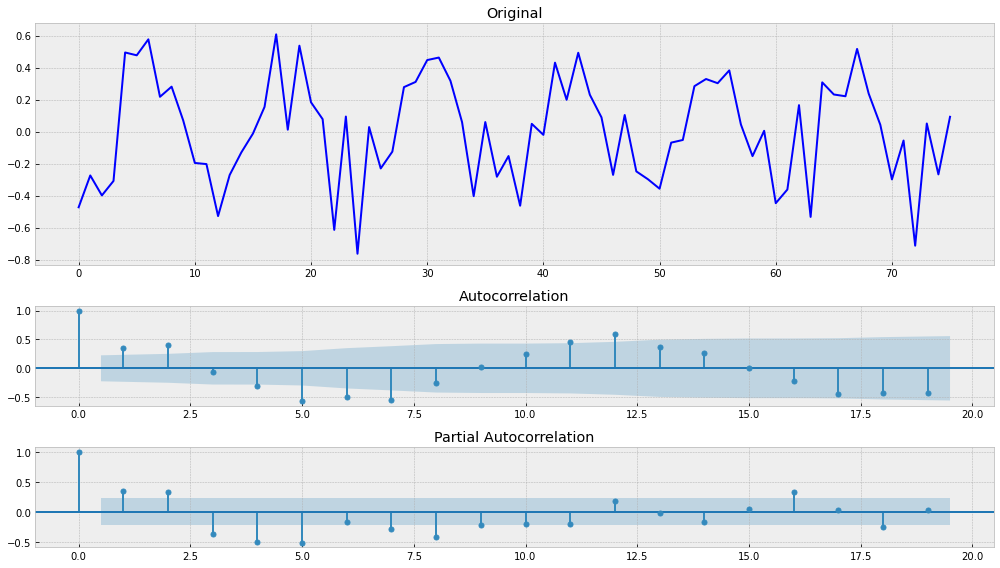

In [159]:
tsplot(sales_of_company)

Если ориентироваться на статистики, то при 0.05 ряд уже стационарен, по графикам тренда больше нет, но похоже, что есть сезонность, попробуем дифференцировать ещё раз:

In [162]:
sales_of_company = np.diff(sales_of_company, 1)

Results of Dickey-Fuller Test:
Test Statistic                -7.101182e+00
p-value                        4.164137e-10
#Lags Used                     1.100000e+01
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


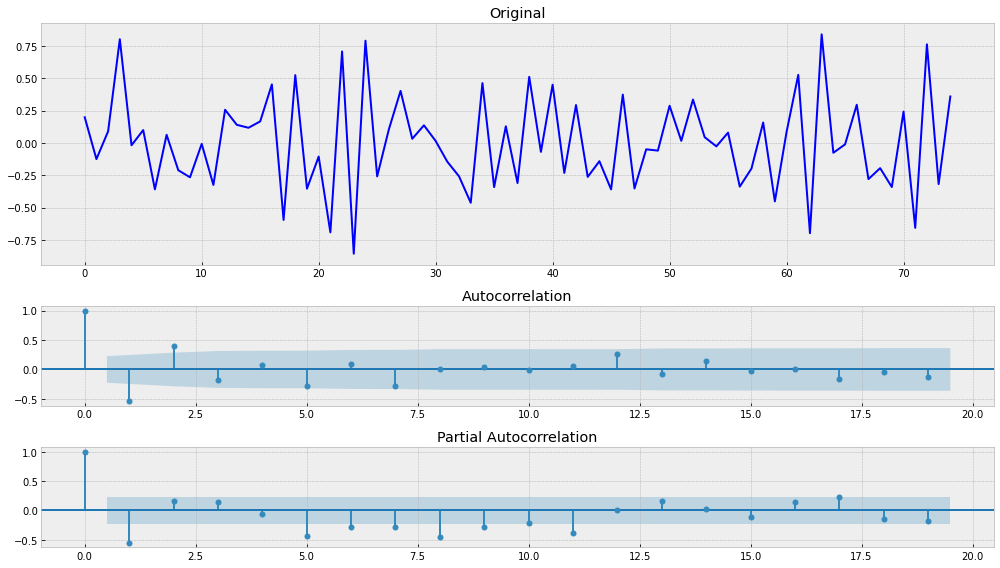

In [163]:
tsplot(sales_of_company)

Можно осстановиться на этом или попробовать убрать сезонность

In [164]:
sales_of_company = sales_of_company[12:] - sales_of_company[:-12]

Results of Dickey-Fuller Test:
Test Statistic                 -5.290390
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


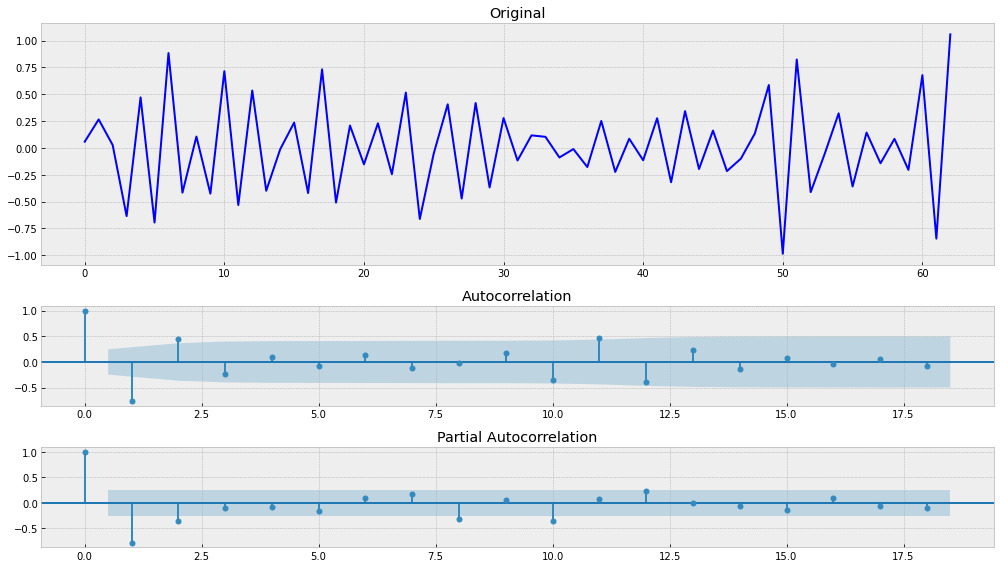

In [165]:
tsplot(sales_of_company)

#### weekly-closings-of-the-dowjones-

In [166]:
closing_df = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")

closing_df.head()

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43


In [167]:
closing = closing_df.Close

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


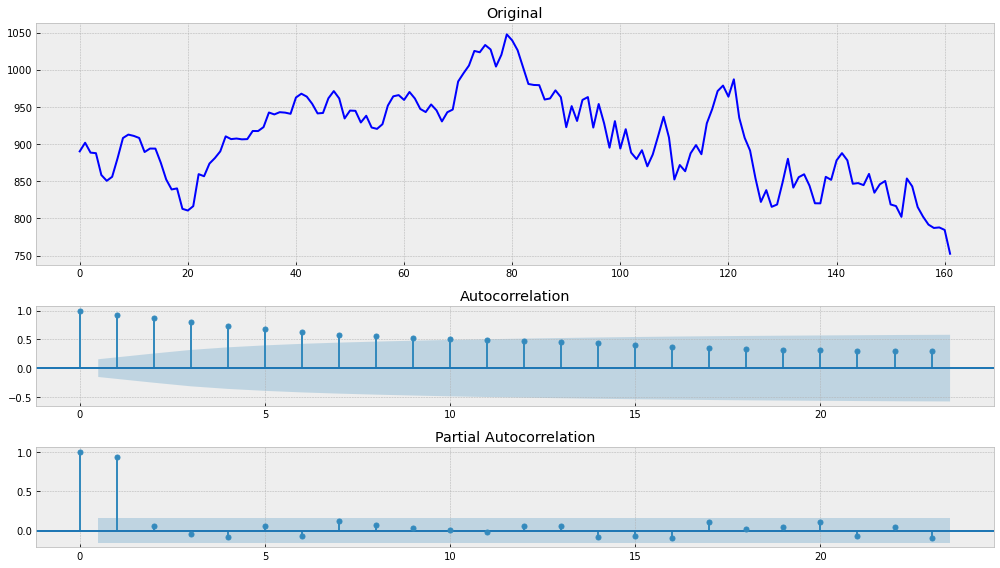

In [168]:
tsplot(closing)

Здесь визуально не очень понятно, является ли ряд стационарным, но по тестам (p-value 0.62) мы не можем отвергнуть нулевую гипотезу.

Попробуем дифференцировать

In [169]:
closing_t = np.diff(closing, 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.302521e+01
p-value                        2.407586e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


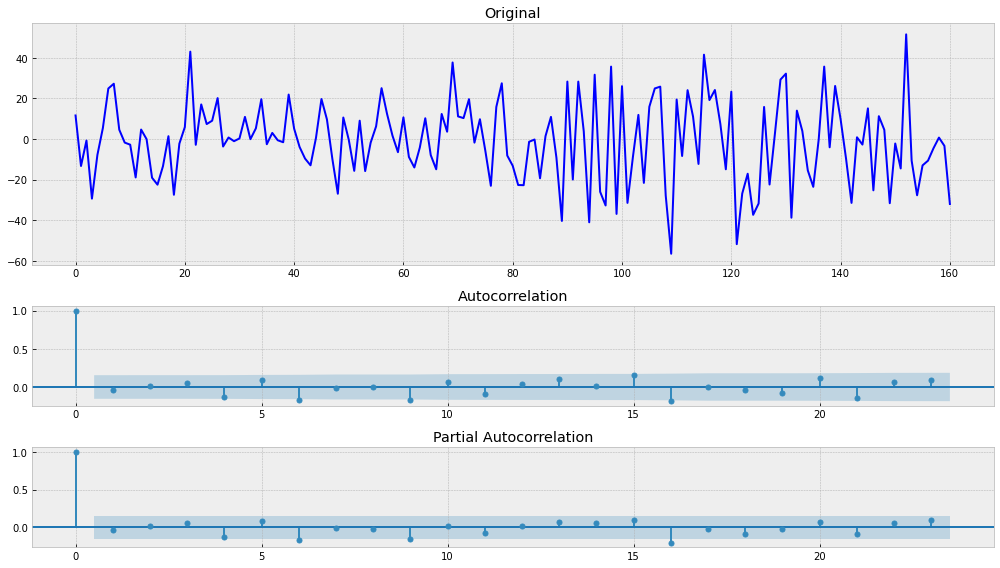

In [170]:
tsplot(closing_t)

Стало намного лучше, можем отвергнуть нулевую гипотезу.

#### monthly-car-sales-in-quebec-1960

In [171]:
car_sales_df = pd.read_csv("Series/monthly-car-sales-in-quebec-1960.csv")

car_sales_df.head()

,Month,Count
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587


In [172]:
car_sales = car_sales_df.Count

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


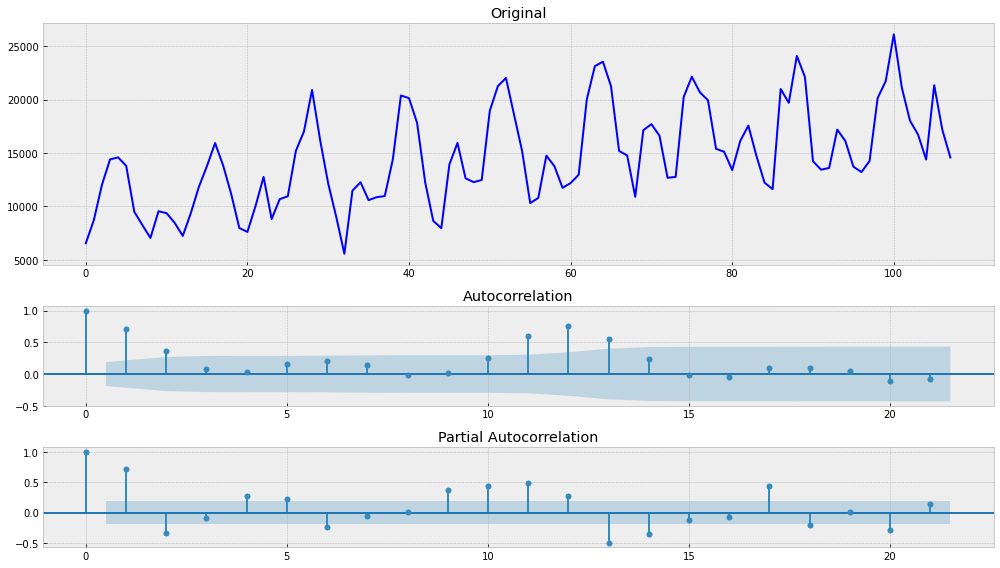

In [173]:
tsplot(car_sales)

Здесь по графику хорошо видно тренд и сезонность, насчёт дисперсии визуально сложно сказать. 

Попробуем применить преобразование boxcox

In [174]:
car_sales = boxcox(car_sales, 0)

Results of Dickey-Fuller Test:
Test Statistic                 -1.452425
p-value                         0.556901
#Lags Used                     13.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


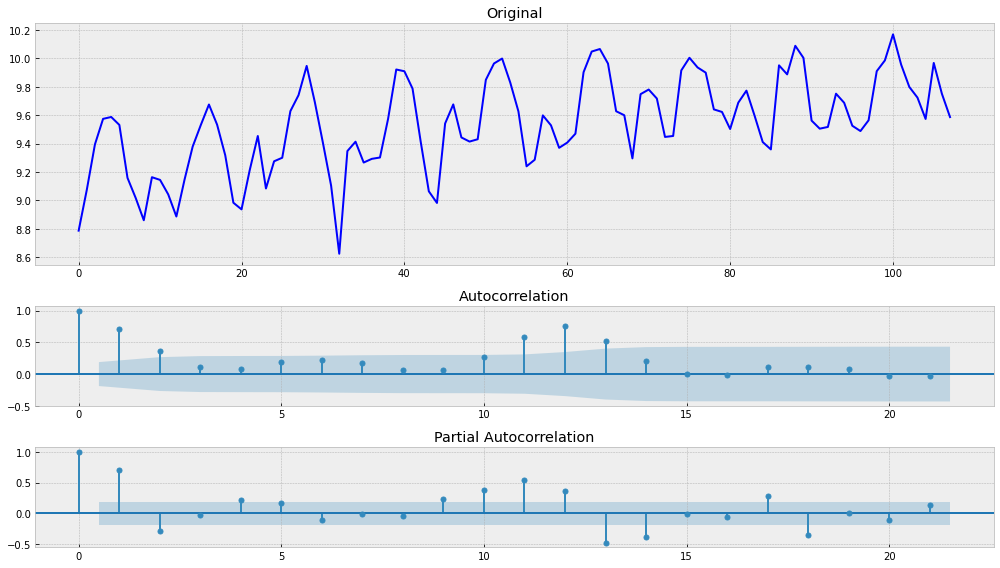

In [175]:
tsplot(car_sales)

Стало чуть лучше, убираем тренд:

In [176]:
car_sales_tr = car_sales[1:] - car_sales[:-1]

Results of Dickey-Fuller Test:
Test Statistic                 -4.193835
p-value                         0.000675
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


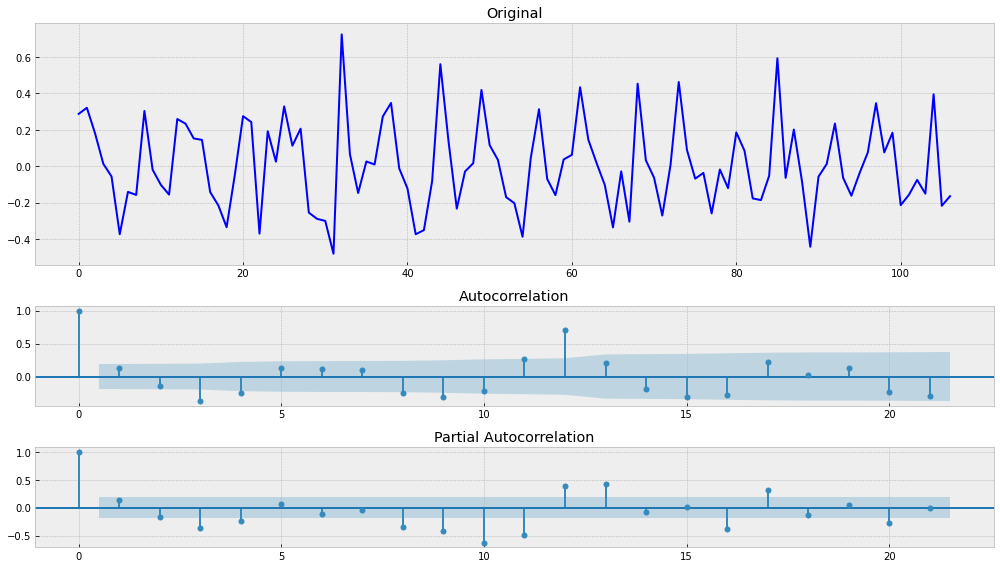

In [177]:
tsplot(car_sales_tr)

p-value очень маленький, мне кажется, с этим рядом уже можно работать, как со стационарным. Попробуем убрать сезонность

In [178]:
car_sales_s = car_sales_tr[12:] - car_sales_tr[:-12]

Results of Dickey-Fuller Test:
Test Statistic                 -3.516067
p-value                         0.007584
#Lags Used                     11.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


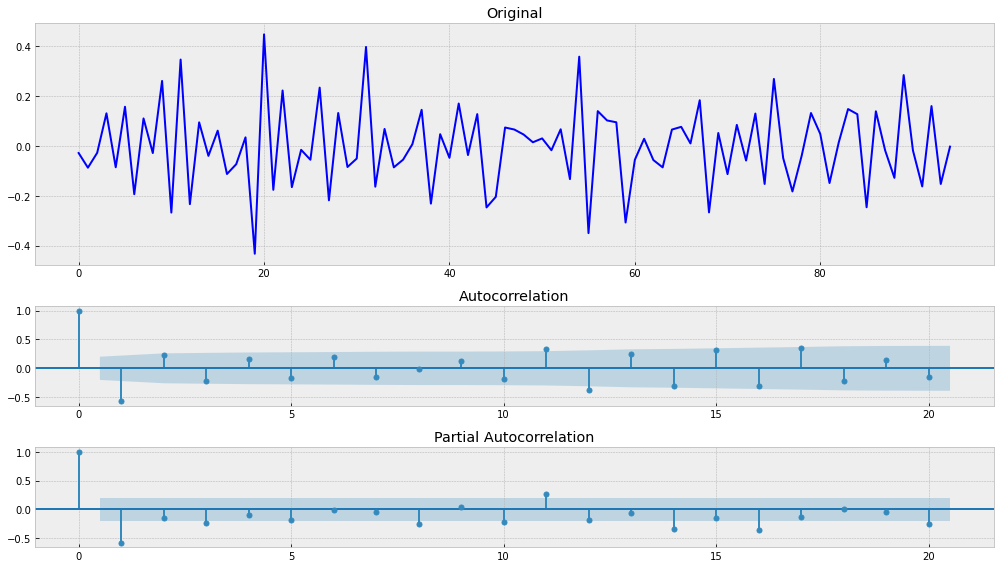

In [179]:
tsplot(car_sales_s)

По статистическим тестам p-value стал выше (мы всё ещё можем отвергнуть нулевую гипотезу), но если смотреть на коррелограммы, мне кажется результат улучшился 